In [1]:
!pip3 install scikit-plot==0.3.4

In [2]:
from diagnostics import Diagnostics

In [3]:
from keras.datasets import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)


In [4]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

W0817 13:42:47.287747 4585964992 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 13:42:47.302096 4585964992 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 13:42:47.304651 4585964992 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 13:42:47.318044 4585964992 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please us

In [7]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

from keras import backend as K

In [8]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [9]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy', auc])

W0817 13:42:47.389901 4585964992 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 13:42:47.480556 4585964992 deprecation_wrapper.py:119] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0817 13:42:47.565335 4585964992 deprecation.py:323] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/ops/metrics_impl.py:809: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [10]:
# hyperparameters
batch_size = 30
num_epochs = 5
validation_split = 0.2

In [11]:
history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size, 
                    epochs=num_epochs, 
                    validation_split=validation_split, 
                    verbose=2)

W0817 13:42:47.760794 4585964992 deprecation.py:323] From /Users/Callista/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4000 samples, validate on 1000 samples
Epoch 1/5
 - 1s - loss: 1.9027 - acc: 0.5183 - auc: 0.7201 - val_loss: 1.2052 - val_acc: 0.7530 - val_auc: 0.8668
Epoch 2/5
 - 1s - loss: 0.8302 - acc: 0.7927 - auc: 0.9066 - val_loss: 0.5668 - val_acc: 0.8500 - val_auc: 0.9316
Epoch 3/5
 - 1s - loss: 0.5236 - acc: 0.8525 - auc: 0.9446 - val_loss: 0.4498 - val_acc: 0.8810 - val_auc: 0.9542
Epoch 4/5
 - 1s - loss: 0.4264 - acc: 0.8755 - auc: 0.9604 - val_loss: 0.4393 - val_acc: 0.8660 - val_auc: 0.9651
Epoch 5/5
 - 1s - loss: 0.3821 - acc: 0.8940 - auc: 0.9685 - val_loss: 0.3623 - val_acc: 0.8900 - val_auc: 0.9713


In [12]:
loss_train, acc_train, auc_train  = model.evaluate(x_train[:5000], y_train[:5000], verbose=False)
loss_test, acc_test, auc_test  = model.evaluate(x_test[:5000], y_test[:5000], verbose=False)
print(f'Train acc/loss: {acc_train:.3}, {loss_train:.3}')
print(f'Test acc/loss: {acc_test:.3}, {loss_test:.3}')

Train acc/loss: 0.91, 0.319
Test acc/loss: 0.862, 0.447


In [13]:
y_pred_train = model.predict(x_train[:5000], verbose=True)
y_pred_test = model.predict(x_test[:5000], verbose=True)

5000/5000 [==============================] - 0s 46us/step


In [14]:
loss_epoch = history.history['loss']
loss_epoch_val = history.history['val_loss']

acc_epoch = history.history['acc']
acc_epoch_val = history.history['val_acc']

auc_epoch = history.history['auc']
auc_epoch_val = history.history['auc']

In [15]:
#def __init__(self, actual, predicted, acc, loss, auc, pixel_values, feature_list, cross_val):
print(y_test[:1])
print(y_pred_test)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[2.9791344e-04 3.5779238e-05 2.3927930e-04 ... 9.8909938e-01
  9.8292498e-05 5.0456375e-03]
 [1.7946776e-02 2.8208692e-03 8.1746322e-01 ... 1.5787504e-06
  2.3459883e-02 3.9498504e-05]
 [7.2098826e-04 9.6288955e-01 1.2504500e-02 ... 4.6718996e-03
  4.5905970e-03 2.2581813e-03]
 ...
 [8.3731331e-02 2.4270372e-02 5.6202829e-01 ... 2.2830418e-05
  1.0376075e-01 1.9889302e-04]
 [1.8141541e-04 4.3002676e-02 1.8725317e-03 ... 1.3847954e-02
  6.9577536e-03 2.9140139e-01]
 [9.9815053e-01 1.8011704e-08 4.0953173e-04 ... 1.0349281e-06
  1.6719365e-04 3.2869691e-06]]


In [16]:
def convert_to_index(array_categorical):
    import numpy as np
    array_index = [np.argmax(array_temp) for array_temp in array_categorical]
    return array_index

In [17]:
y_test = convert_to_index(y_test[:5000])
y_pred_test = convert_to_index(y_pred_test)

print(y_test[:10])
print(y_pred_test[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


In [18]:
plots = Diagnostics(y_test, y_pred_test, [acc_epoch, acc_epoch_val], [loss_epoch, loss_epoch_val], 
            [auc_epoch, auc_epoch_val], 0, 0, 0)

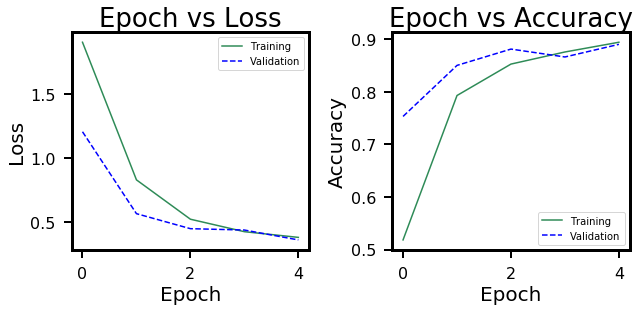

In [29]:
plots.plot_metrics_per_epoch(figsize = (10, 4), name_plot=[0, 1])

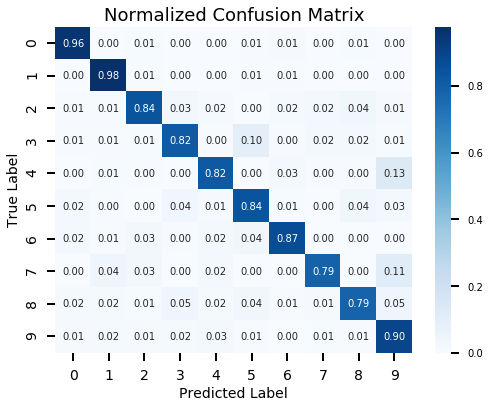

In [20]:
plots.plot_cm(figsize=(8, 6))

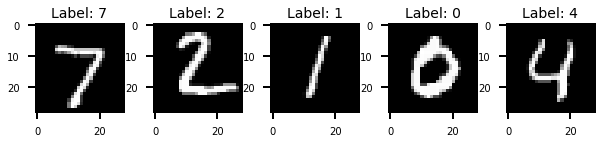

In [21]:
plots.plot_sample_img(x_test[:5], y_pred_test[:5], figsize=(10, 5), filename="Image_Sample.png", show=True)